# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kellie Leopold [GitHub Link](https://github.com/kjleopold/web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [9]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.3
confection                0.1.5
contourpy                 1.3.3
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
et_xmlfile     

#### Question 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [10]:
import requests
import pickle

# Get article from the web
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'
response = requests.get(url)

# Extract the HTML content
html = response.text

# Save HTML to a .pkl file
with open('article.pkl', 'wb') as file:
    pickle.dump(html, file)

print("✅ Article HTML saved to article.pkl")

✅ Article HTML saved to article.pkl


#### Question 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [11]:
from bs4 import BeautifulSoup

# Read the HTML
with open('article.pkl', 'rb') as file:
    html = pickle.load(file)

# Parse HTML
soup = BeautifulSoup(html, 'html.parser')

# Find the main article tag
article_tag = soup.find('article')

# Extract plain text from the article
article_text = article_tag.get_text()

# Print the article text
print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

#### Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [12]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# Load model and add the pipeline component
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")
doc = nlp(article_text)

# Token filtering
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Count interesting words
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]
token_freq = Counter(interesting_tokens)

print("Top 5 most frequent words and their counts:")
for i, (token, freq) in enumerate(token_freq.most_common(5), start=1):
    print(f"{i}. {token}: {freq}")

Top 5 most frequent words and their counts:
1. laser: 35
2. headlights: 19
3. headlight: 11
4. technology: 10
5. led: 10


#### Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [13]:
# Count interesting lemmas
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

print("Top 5 most frequent lemmas and their counts:")
for i, (lemma, freq) in enumerate(lemma_freq.most_common(5), start=1):
    print(f"{i}. {lemma}: {freq}")

Top 5 most frequent lemmas and their counts:
1. laser: 40
2. headlight: 28
3. beam: 12
4. technology: 10
5. led: 10


#### Question 5. Define the following methods:
* `score_sentence_by_token(sentence, interesting_tokens)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
* `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [14]:
# Define score_sentence_by_token
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculate the fraction of tokens in a sentence whose text
    (converted to lowercase) appears in the interesting_tokens list.
    
    Args:
      sentence (str): a sentence as a string
      interesting_tokens (list of str): list of interesting tokens (lowercase)
      
    Returns:
      float: count of matching tokens / total number of tokens in sentence
    """
    words = sentence.split()
    if not words:
        return 0
    interesting_count = sum(1 for word in words if word.lower() in interesting_tokens)
    return interesting_count / len(words)

# Test score_sentence_by_token with the first sentence
first_sentence = soup.find('p').get_text()
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
print(f"The first sentence token score is: {token_score:.2f}")

# Define score_sentence_by_lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculate the fraction of tokens in a sentence whose text
    (converted to lowercase) appears in the interesting_lemmas list.
    
    Args:
      sentence (str): a sentence as a string
      interesting_lemmas (list of str): list of interesting lemmas (lowercase)
      
    Returns:
      float: count of matching lemmas / total number of tokens in sentence
    """
    words = sentence.split()
    if not words:
        return 0
    interesting_count = sum(1 for word in words if word.lower() in interesting_lemmas)
    return interesting_count / len(words)

# Test score_sentence_by_lemma with first sentence
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)
print(f"The first sentence lemma score is: {lemma_score:.2f}")

The first sentence token score is: 0.39
The first sentence lemma score is: 0.34


#### Question 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

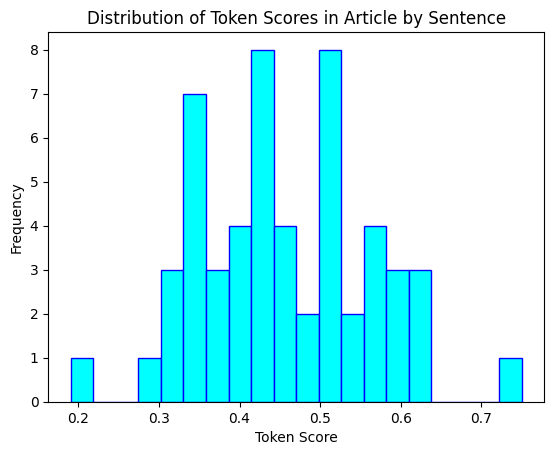

In [15]:
import matplotlib.pyplot as plt

# Split text into sentences by periods, stripping whitespace
def get_sentences(text):
    """
    Splits the text into sentences by period and strips whitespace.
    """
    return [sentence.strip() for sentence in text.split('.') if sentence.strip()]

# Get list of sentences
sentences = get_sentences(article_text)

# Calculate token scores for each sentence
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# Plot histogram
plt.hist(scores, bins=20, edgecolor='blue', color='aqua')
plt.title('Distribution of Token Scores in Article by Sentence')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of token scores appears to be between 0.34 and 0.56.

#### Question 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

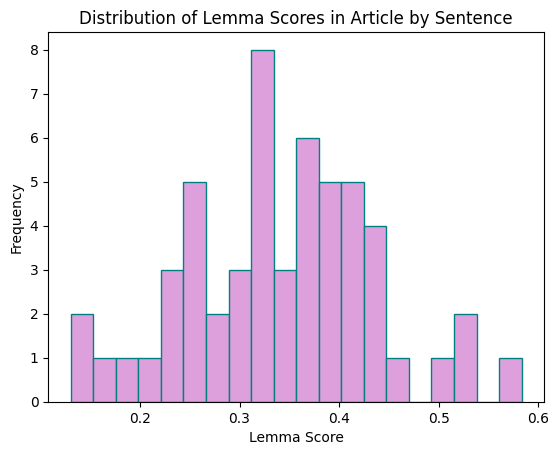

In [16]:
# use function score_sentence_by_lemma to get the scores
scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# plot histogram of the scores of sentences
plt.hist(scores, bins=20, edgecolor='teal', color="plum")
plt.title('Distribution of Lemma Scores in Article by Sentence')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of scores is between 0.26 and 0.42.

#### Question 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

**Answer**: The lists I generated in Questions 3 and 4 happened to include only nouns, so in my case, no tokens or lemmas would be omitted. However, that was by chance, the code didn’t explicitly filter for nouns.

If we did want to include only nouns, then other parts of speech like verbs, adjectives, numbers, and so on would be omitted from the lists. We could modify our filter function to include only nouns like this: return (not token.is_space and not token.is_punct and not token.is_stop and token.pos_ in ('NOUN')).

In [17]:
# Export to HTML

!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 363847 bytes to web-scraping.html
